## Tox 21 dataset exploration



### 有毒化学物質データ - NIH Tox21 Data Challenge 2014
2014 年の Tox21 Data Challenge は、Tox21 (Toxicology in the 21st Century) の取り組みの中でテストを実施した、生物学的経路を破壊して中毒を引き起こす化学物質や化合物の毒性について、科学者の理解を深めることを目的としています。

The purpose of this notebook is as follows,

 - Explain [Tox21 dataset](https://tripod.nih.gov/tox21/challenge/): Check the labels and visualization of molecules to understand what kind of data are stored.
 - Explain internal structure of tox21 dataset in `chainer_chemistry`: We handle the dataset with `NumpyTupleDataset`.
 - Explain how `preprocessor` and `parser` work on `chainer_chemistry`: One concrete example using `NFPPreprocessor` is explained.

It is out of scope of this notebook to explain how to train graph convolutional network using this dataset, please refer [document tutorial](http://chainer-chemistry.readthedocs.io/en/latest/tutorial.html#) or try `train_tox21.py` in [tox21 example](https://github.com/pfnet-research/chainer-chemistry/tree/master/examples/tox21) for the model training.

[Note]
This notebook is executed on 1, March, 2018. 
The behavior of tox21 dataset in `chainer_chemistry` might change in the future.

Loading modules and set loglevel.

In [1]:
import logging
from rdkit import RDLogger
from chainer_chemistry import datasets

# Disable errors by RDKit occurred in preprocessing Tox21 dataset.
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

# show INFO level log from chainer chemistry
logging.basicConfig(level=logging.INFO)

Tox 21 dataset consists of train/validation/test data and they can be downloaded automatically with chainer chemistry. 
The format of tox21 dataset is "sdf" file.
You can check the file path of downloaded sdf file with `get_tox21_filepath` method. 

In [2]:
train_filepath = datasets.get_tox21_filepath('train')
val_filepath = datasets.get_tox21_filepath('val')
test_filepath = datasets.get_tox21_filepath('test')

print('train_filepath =', train_filepath)
print('val_filepath =', val_filepath)
print('test_filepath =', test_filepath)

train_filepath = C:\Users\hkawaguc.ZENYAKU\.chainer\dataset\pfnet/chainer/tox21\tox21_10k_data_all.sdf
val_filepath = C:\Users\hkawaguc.ZENYAKU\.chainer\dataset\pfnet/chainer/tox21\tox21_10k_challenge_test.sdf
test_filepath = C:\Users\hkawaguc.ZENYAKU\.chainer\dataset\pfnet/chainer/tox21\tox21_10k_challenge_score.sdf


Dataset contains 12 types of toxity, the label of toxity can be checked by `get_tox21_label_names` method.


In [3]:
label_names = datasets.get_tox21_label_names()
print('tox21 label_names =', label_names)

tox21 label_names = ['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']


### Preprocessing dataset

Dataset extraction depends on the preprocessing method, which is determined by `preprocessor`.

Here, let's look an example of using `NFPPreprocessor` preprocessor for tox21 dataset exraction.

Procedure is as follows,

1. Instantiate `preprocessor` (here `NFPPreprocessor` is used).
2. call `get_tox21` method with `preprocessor`.
 - `labels=None` option is used to extract all labels. In this case, 12 types of toxity labels are extracted (see above).

[Note] 
 - `return_smiles` option can be used to get SMILES information together with the dataset itself.
 - Preprocessing result depends on RDKit version. 
You might get different results due to the difference of RDKit behavior between version.

In [4]:
import rdkit

print('RDKit version: ', rdkit.__version__)

RDKit version:  2017.09.3


In [5]:
from chainer_chemistry.dataset.preprocessors.nfp_preprocessor import \
    NFPPreprocessor

preprocessor = NFPPreprocessor()
train, val, test, train_smiles, val_smiles, test_smiles = datasets.get_tox21(preprocessor, labels=None, return_smiles=True)

100%|██████████| 11764/11764 [00:19<00:00, 610.02it/s]
INFO:chainer_chemistry.dataset.parsers.sdf_file_parser:Preprocess finished. FAIL 6, SUCCESS 11758, TOTAL 11764
100%|██████████| 296/296 [00:00<00:00, 533.32it/s]
INFO:chainer_chemistry.dataset.parsers.sdf_file_parser:Preprocess finished. FAIL 1, SUCCESS 295, TOTAL 296
100%|██████████| 647/647 [00:00<00:00, 674.84it/s]
INFO:chainer_chemistry.dataset.parsers.sdf_file_parser:Preprocess finished. FAIL 2, SUCCESS 645, TOTAL 647


Dataset extraction depends on the `preprocessor`, and you may use other type of `preprocessor` as well.

Below is another example of using `GGNNPreprocessor` for dataset extraction. But it takes little bit of time, you can skip it for the following tutorial.

In [6]:
from chainer_chemistry.dataset.preprocessors.ggnn_preprocessor import \
    GGNNPreprocessor

# uncomment it if you want to try `GGNNPreprocessor`
ggnn_preprocessor = GGNNPreprocessor()
results = datasets.get_tox21(ggnn_preprocessor, labels=None, return_smiles=True)
train_ggnn, val_ggnn, test_ggnn, train_smiles_ggnn, val_smiles_ggnn, test_smiles_ggnn = results

100%|██████████| 11764/11764 [00:23<00:00, 508.41it/s]
INFO:chainer_chemistry.dataset.parsers.sdf_file_parser:Preprocess finished. FAIL 6, SUCCESS 11758, TOTAL 11764
100%|██████████| 296/296 [00:00<00:00, 433.71it/s]
INFO:chainer_chemistry.dataset.parsers.sdf_file_parser:Preprocess finished. FAIL 1, SUCCESS 295, TOTAL 296
100%|██████████| 647/647 [00:01<00:00, 586.47it/s]
INFO:chainer_chemistry.dataset.parsers.sdf_file_parser:Preprocess finished. FAIL 2, SUCCESS 645, TOTAL 647


### Check extracted dataset

First, let's check number of data for train/validation/test dataset.

In [7]:
print('dataset information...')
print('train', type(train), len(train))
print('val', type(val), len(val))
print('test', type(test), len(test))

print('smiles information...')
print('train_smiles', type(train_smiles), len(train_smiles))

dataset information...
train <class 'chainer_chemistry.datasets.numpy_tuple_dataset.NumpyTupleDataset'> 11758
val <class 'chainer_chemistry.datasets.numpy_tuple_dataset.NumpyTupleDataset'> 295
test <class 'chainer_chemistry.datasets.numpy_tuple_dataset.NumpyTupleDataset'> 645
smiles information...
train_smiles <class 'numpy.ndarray'> 11758


There are 11757 data in `train`, 295 data in `val` and 645 data in `test` respectively.
(You might get different result with different version of `rdkit`.)

The dataset is a class of `NumpyTupleDataset`, where i-th dataset features can be accessed by `dataset[i]`.

When `NFPPreprocessor` is used, each dataset consists of following features
 1. atom feature: representing atomic number of given molecule. 
 2. adjacency matrix feature: representing adjacency matrix of given molecule.
 3. label feature: representing toxity (label) of given molecule.
    Here, 0 indicates negative (no toxity), 1 indicates positive (toxic) and -1 indicates data is not available, respectively.

Let's look an example of 6-th train dataset

In [8]:
index = 6

print('index={}, SMILES={}'.format(index, train_smiles[index]))
atom, adj, labels = train[index]
# This molecule has N=12 atoms.
print('atom', atom.shape, atom)
# adjacency matrix is NxN matrix, where N is number of atoms in the molecule.
# Unlike usual adjacency matrix, diagonal elements are filled with 1, for NFP calculation purpose.
print('adj', adj.shape)
print(adj)
print('labels', labels)

index=6, SMILES=Cc1ccc([N+](=O)[O-])c2c1O[Hg]2
atom (12,) [ 6  6  6  6  6  7  8  8  6  6  8 80]
adj (12, 12)
[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.]]
labels [-1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1]


### Visualizing the molecule

One might want to visualize molecule given SMILES information.
Here is an example code:


In [9]:
# This script is referred from http://rdkit.blogspot.jp/2015/02/new-drawing-code.html
# and http://cheminformist.itmol.com/TEST/wp-content/uploads/2015/07/rdkit_moldraw2d_2.html
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG

from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
def moltosvg(mol,molSize=(450,150),kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg

def render_svg(svg):
    # It seems that the svg renderer used doesn't quite hit the spec.
    # Here are some fixes to make it work in the notebook, although I think
    # the underlying issue needs to be resolved at the generation step
    return SVG(svg.replace('svg:',''))

smiles: Cc1ccc([N+](=O)[O-])c2c1O[Hg]2


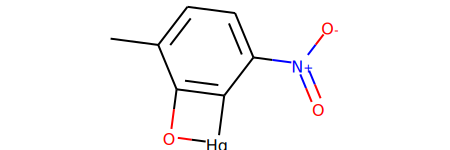

In [10]:
smiles = train_smiles[index]
mol = Chem.MolFromSmiles(train_smiles[index])

print('smiles:', smiles)
render_svg(moltosvg(mol))

[Note] SVG images cannot be displayed on GitHub, but you can see an image of molecule when you execute it on jupyter notebook.

### Interactively watch through the tox21 dataset

Jupyter notebook provides handy module to check/visualize the data.
Here `interact` module can be used to interactively check the internal of tox 21 dataset.

index=5878, SMILES=CCN(CC)CCOC(=O)c1ccc(N)cc1.Cl
atom [ 6  6  7  6  6  6  6  8  6  8  6  6  6  6  7  6  6 17]
labels [ 0  0  0  0  0  0  0 -1  0 -1  0  0]


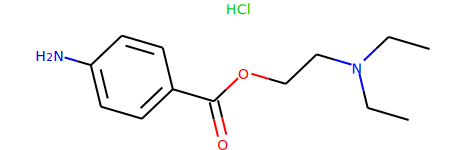

<function __main__.show_train_dataset(index)>

In [11]:
from ipywidgets import interact

def show_train_dataset(index):
    atom, adj, labels = train[index]
    smiles = train_smiles[index]
    print('index={}, SMILES={}'.format(index, smiles))
    print('atom', atom)
    # print('adj', adj)
    print('labels', labels)
    mol = Chem.MolFromSmiles(train_smiles[index])
    return render_svg(moltosvg(mol))

interact(show_train_dataset, index=(0, len(train) - 1, 1))

### Appendix: how to save the molecule figure?

### 1. Save with SVG format

First method is simply save svg in file.


In [12]:
import os
dirpath = 'images'

if not os.path.exists(dirpath):
    os.mkdir(dirpath)

In [13]:
def save_svg(mol, filepath):
    svg = moltosvg(mol)
    with open(filepath, "w") as fw:
        fw.write(svg)

In [14]:
index = 6
save_filepath = os.path.join(dirpath, 'mol_{}.svg'.format(index))
print('drawing {}'.format(save_filepath))

mol = Chem.MolFromSmiles(train_smiles[index])
save_svg(mol, save_filepath)

drawing images\mol_6.svg


### 2. Save with png format

`rdkit` provides `Draw.MolToFile` method to visualize mol instance and save it to png format.

In [15]:
from rdkit.Chem import Draw

def save_png(mol, filepath, size=(600, 600)):
    Draw.MolToFile(mol, filepath, size=size)

In [16]:
index = 6
save_filepath = os.path.join(dirpath, 'mol_{}.png'.format(index))
print('drawing {}'.format(save_filepath))

mol = Chem.MolFromSmiles(train_smiles[index])
save_png(mol, save_filepath, size=(600, 600))

drawing images\mol_6.png
